# Interactive minimal working example
In this notebook you are going to run a single simulation, interactively, using the `simulation module` in `dlensalot/ana/config/examples/`, and our goal is to plot the lensing potential estimate.

# Header

In [1]:
import os
from os.path import join as opj
import numpy as np
import healpy as hp

import matplotlib.pyplot as plt

import lenscarf
from lenscarf.run import run

cond4mpi does not exists
could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 2 OMP threads


# Choose analysis

## We will go step by step and do QE lens reconstruction first

In [2]:
## minimal working example
fn = opj(os.path.dirname(os.path.abspath(lenscarf.__file__)),'ana/config/examples/mwe/conf_mwe_fullsky.py')
print(fn)
ana_mwe = run(config=fn, job_id='QE_lensrec', verbose=False).job

/global/u2/s/sebibel/git/lenscarf/lenscarf/ana/config/examples/mwe/conf_mwe_fullsky.py


# Check configuration
Before running lensing reconstruction, let us look into the configuration file

In [17]:
print(ana_mwe.dlensalot_model.__str__())

	dversion:	
	tr:	2
	k:	p_p
	version:	
	simidxs:	[0 1]
	simidxs_mf:	[0 1]
	Nmf:	2
	TEMP_suffix:	my_first_dlensalot_analysis
	TEMP:	/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_mwe/mwe_lminB200_my_first_dlensalot_analysis
	lm_max_len:	(4000, 4000)
	cls_unl:	{'tt': array([0.00000000e+00, 3.15384486e+03, 1.08426834e+03, ...,
       9.66229400e-10, 9.65260803e-10, 9.64292720e-10]), 'ee': array([0.00000000e+00, 0.00000000e+00, 3.62414129e-02, ...,
       2.00006407e-12, 1.99423451e-12, 1.98828000e-12]), 'bb': array([0., 0., 0., ..., 0., 0., 0.]), 'te': array([0.00000000e+00, 0.00000000e+00, 2.93875049e+00, ...,
       1.40842175e-11, 1.40724986e-11, 1.40607859e-11]), 'pp': array([0.00000000e+00, 5.94954817e-08, 8.92404300e-09, ...,
       7.91637420e-25, 7.91001884e-25, 7.90366882e-25]), 'pt': array([0.00000000e+00, 6.20759604e-03, 1.28926184e-03, ...,
       2.46796544e-19, 2.46782393e-19, 2.46768224e-19]), 'pe': array([ 0.00000000e+00,  0.00000000e+00, -5.60260517e-06, ...,
        2.531

## And how does the simulation data look like?

In [5]:
ana_mwe.sims.get_sim_pmap(0)

 [00:02:10] collecting bands > 00%
 [00:02:11] collecting bands > 00%


(array([ 4.12434467, -2.9311794 ,  3.73770884, ..., -4.04839562,
         2.49361223,  0.78644722]),
 array([ 5.01124793, -3.78710219,  3.75455382, ..., -6.37190179,
         9.6573793 , -7.46562312]))

In [6]:
ana_mwe.run()

 [00:02:08] collecting bands > 00%
 [00:02:11] collecting bands > 00%
CL[1]  16425105110948.861
GL[1] (before subtraction)  16425087058645.094
GL[1] (after subtraction)  -18052303.767578125
 [00:00:00] calculating p_p MF -----> 50%
Cached  /pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_mwe/mwe_lminB200_my_first_dlensalot_analysis/qlms_dd/simMF_k1p_p_031ee8071545c35ffdc0aa20da07ce2e36ce543f.fits


In [11]:
plm = ana_mwe.get_plm(0)

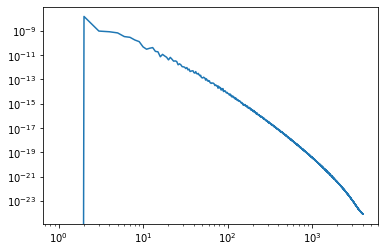

In [12]:
plt.plot(hp.alm2cl(plm))
plt.xscale('log')
plt.yscale('log')

## iterative lensing reconstruction